In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file = "../data/output.csv"
df = pd.read_csv(file)
df.head()

,Unnamed: 0,service_request_id,requested_datetime,case_age_days,updated_datetime,status,lat,long,district,case_origin
0,0,80508,2016-05-20T08:55:00,0.0,2016-05-20T16:42:00,Closed,32.831881,-117.231233,2.0,Phone
1,1,80510,2016-05-20T09:05:00,0.0,2016-05-20T16:42:00,Closed,32.716021,-117.159053,3.0,Web
2,2,80518,2016-05-20T09:31:00,19.0,2016-06-07T21:39:00,Closed,32.760286,-117.104798,9.0,Phone
3,3,80531,2016-05-20T10:43:00,5.0,2016-05-25T22:37:00,Closed,32.955916,-117.252152,1.0,Phone
4,4,80535,2016-05-20T11:14:00,0.0,2016-05-20T13:36:00,Closed,32.710295,-117.155278,3.0,Web


In [4]:
overall_case_df = df[['case_age_days','case_origin']]
overall_case_df.head()

,case_age_days,case_origin
0,0.0,Phone
1,0.0,Web
2,19.0,Phone
3,5.0,Phone
4,0.0,Web


Text(0.5, 0, 'Average Days Open')

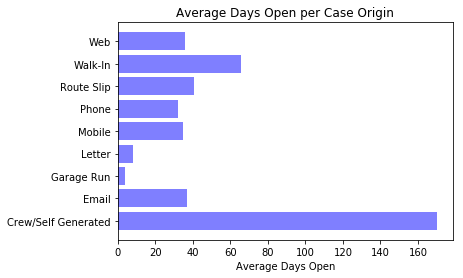

In [10]:
case_group = overall_case_df.groupby(['case_origin']).mean()
case_group.reset_index(inplace=True)
case_group.head()  
plt.barh(case_group['case_origin'], case_group['case_age_days'], color='b', alpha=.5, align='center')
plt.title('Average Days Open per Case Origin')
plt.xlabel('Average Days Open')

In [6]:
case_count = overall_case_df.groupby(['case_origin']).count()
case_count.reset_index(inplace=True)
case_count.head(10)

,case_origin,case_age_days
0,Crew/Self Generated,1
1,Email,293
2,Garage Run,1
3,Letter,3
4,Mobile,25107
5,Phone,4891
6,Route Slip,7
7,Walk-In,2
8,Web,16801


In [7]:
overall_district_df = df[['case_age_days', 'district']]
overall_district_df.dropna(subset=['district'])
overall_district_df['district_l'] = 'District' + ' ' + df['district'].astype(str)
missing_district = overall_district_df[overall_district_df['district_l'] == 'District nan'].index
overall_district_df.drop(missing_district, inplace=True)
overall_district_df.head()

/Users/anthonystansall/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/anthonystansall/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,case_age_days,district,district_l
0,0.0,2.0,District 2.0
1,0.0,3.0,District 3.0
2,19.0,9.0,District 9.0
3,5.0,1.0,District 1.0
4,0.0,3.0,District 3.0


Text(0.5, 0, 'Average Days Open')

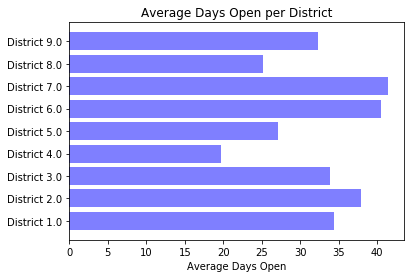

In [8]:
district_group = overall_district_df.groupby(['district_l']).mean()
district_group.reset_index(inplace=True)
plt.barh(district_group['district_l'], district_group['case_age_days'], color='b', alpha=.5, align='center')
plt.title('Average Days Open per District')
plt.xlabel('Average Days Open')

In [9]:
district_count = overall_district_df.groupby(['district_l']).count()
district_count.reset_index(inplace=True)
district_count.head()

,district_l,case_age_days,district
0,District 1.0,4190,4395
1,District 2.0,8474,8723
2,District 3.0,6783,7038
3,District 4.0,2608,2649
4,District 5.0,4379,4443


Text(0.5, 0, 'Number of Potholes')

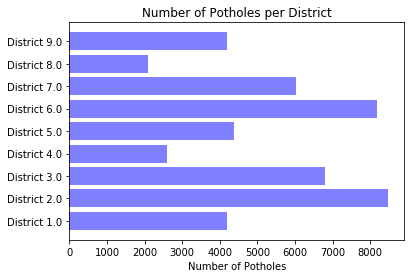

In [10]:
plt.barh(district_count['district_l'], district_count['case_age_days'], color='b', alpha=.5, align='center')
plt.title('Number of Potholes per District')
plt.xlabel('Number of Potholes')

In [11]:
duplicate_df = df[df.duplicated(['lat', 'long', 'district', 'case_origin'], keep=False)]
duplicate_df.head(10)

,Unnamed: 0,service_request_id,requested_datetime,case_age_days,updated_datetime,status,lat,long,district,case_origin
6,6,80547,2016-05-20T12:26:00,344.0,2017-04-29T14:02:00,Closed,32.811735,-117.200984,2.0,Phone
10,10,80588,2016-05-20T16:36:00,0.0,2016-05-20T16:37:00,Closed,32.833587,-117.232080,2.0,Phone
11,11,80819,2016-05-21T09:34:00,0.0,2016-05-21T09:42:00,Closed,32.833587,-117.232080,2.0,Phone
12,12,80820,2016-05-21T09:37:00,0.0,2016-05-21T09:42:00,Closed,32.833587,-117.232080,2.0,Phone
14,14,80830,2016-05-21T11:14:00,0.0,2016-05-21T11:14:00,Closed,32.833587,-117.232080,2.0,Phone
15,15,80838,2016-05-21T13:44:00,17.0,2016-06-07T21:39:00,Closed,32.797547,-117.243362,2.0,Web
50,50,81028,2016-05-22T20:27:00,4.0,2016-05-27T00:02:00,Closed,32.829199,-117.187601,6.0,Web
51,51,81029,2016-05-22T20:28:00,4.0,2016-05-27T00:02:00,Closed,32.829199,-117.187601,6.0,Web
52,52,81030,2016-05-22T20:30:00,4.0,2016-05-27T00:02:00,Closed,32.829199,-117.187601,6.0,Web
63,63,81114,2016-05-23T06:14:00,12.0,2016-06-04T00:02:00,Closed,32.917217,-117.120560,6.0,Phone
